## DBSCAN Clustering

In [167]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('display.max_columns', 100)

In [168]:
df = pd.read_excel('marketing_campaign1.xlsx')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


### Data Preprocessing

In [169]:
# Checking for missing values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [170]:
# Imputing Missing Values
df['Income'].fillna(df['Income'].median(), inplace=True)

In [171]:
# Converting Categorical features into numerical variables
dt = pd.get_dummies(df[['Education', 'Marital_Status']])
df = pd.concat([df, dt], axis=1)

# Droppint the original columns (categorical)
df.drop(columns=['Education', 'Marital_Status', 'ID'], inplace=True)

In [172]:
# Removing Outliers from Income and Year_Birth based on the finding in EDA
from scipy import stats

for i in df[['Income', 'Year_Birth']]:
    z_score = stats.zscore(df[i])
    filtered_data = (abs(z_score) < 5)
    df = df[filtered_data]

### Feature Engineering

In [173]:
# Creating a new feature using Dt_Customer
df['CustomerLifetime'] = pd.datetime.now().year - df['Dt_Customer'].dt.year

# Dropping Dt_Customer column
df.drop(columns=['Dt_Customer'], inplace=True)

# Dropping other unused columns
df.drop(columns=['Z_CostContact'], inplace=True)

In [174]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

### Dimensionality Reduction

In [175]:
# Reducing number of dimensions using PCA
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(scaled_data)

array([[ 3.81258701e+00, -7.07828720e-01, -4.37015468e-01, ...,
         1.35710627e-14,  5.38201111e-16,  2.68886645e-16],
       [-2.35048994e+00, -5.44059604e-01, -3.13370705e-01, ...,
        -2.94140880e-15, -2.20405232e-16, -1.47299150e-16],
       [ 1.70817134e+00, -3.48520471e-01, -1.37901317e+00, ...,
         7.73215784e-15,  5.98547119e-16,  2.58904083e-16],
       ...,
       [ 1.48039158e+00, -8.33393326e-02,  5.88182604e-01, ...,
         6.84133193e-16,  1.92383093e-17, -4.14244701e-17],
       [ 1.73098087e+00,  1.23518440e+00, -1.05109551e+00, ...,
        -2.36272230e-16, -1.19273880e-16,  2.93435196e-19],
       [-1.58762774e+00,  1.91902162e+00,  1.36687808e+00, ...,
         4.37681925e-16,  2.08547256e-16,  6.35685455e-18]])

In [176]:
# Calculating Explained Variance and Cumulative Explained Variance
import numpy as np

explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

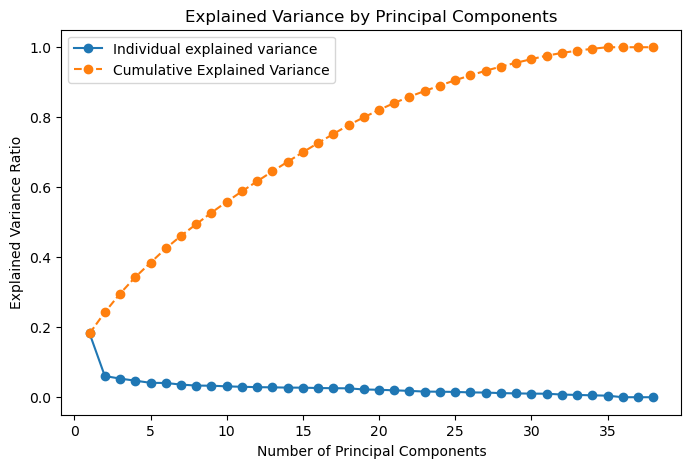

In [177]:
# Plotting explained variance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
plt.plot(
    range(1, len(explained_variance) + 1),
    explained_variance,
    marker = 'o',
    label = 'Individual explained variance'
)
plt.plot(
    range(1, len(explained_variance) + 1),
    cumulative_explained_variance,
    marker = 'o',
    linestyle = '--',
    label = 'Cumulative Explained Variance'
)
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.show()

#### Optimal Number of Components

In [178]:
# Finding the optimal number of components
optimal_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f'Optimal number of components to explain 95% of the variance: {optimal_components}')

Optimal number of components to explain 95% of the variance: 29


In [179]:
# Transforming data with the optimal number of components
pca_optimal = PCA(n_components=optimal_components)
optimal_data = pca_optimal.fit_transform(scaled_data)

### DBSCAN implementation

In [180]:
from sklearn.cluster import DBSCAN

#### Finding Optimal eps values using K nearest neighbors

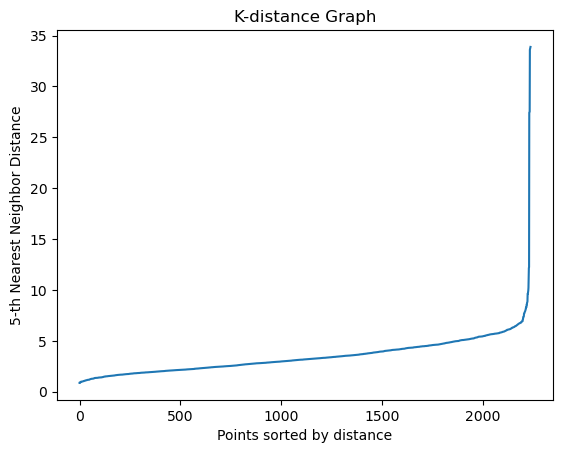

In [181]:
from sklearn.neighbors import NearestNeighbors

k = 5
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(scaled_data)
distances, indices = neighbors_fit.kneighbors(scaled_data)
distances = np.sort(distances[:, k-1], axis=0)
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{k}-th Nearest Neighbor Distance')
plt.title('K-distance Graph')
plt.show()

The 'elbow' or 'knee' point in the plot can be considered as a good estimate for eps.\

The minimum samples can be derived from the number of dimensions in the dataset,\
as min_samples >= dimensions + 1.

In [182]:
# Applying DBSCAN
dbscan = DBSCAN(eps=6.0, min_samples=50)
df['cluster'] = dbscan.fit_predict(optimal_data)

# Analzing clusters
cluster_summary = df.groupby('cluster').mean()
cluster_summary

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_Revenue,Response,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,CustomerLifetime
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-1,1967.777778,70467.348148,0.200000,0.318519,45.377778,635.622222,46.118519,356.222222,64.170370,53.600000,68.059259,2.237037,5.414815,5.651852,6.925926,4.488889,0.229630,0.385185,0.466667,0.466667,0.222222,0.148148,11.0,0.562963,0.111111,0.014815,0.474074,0.155556,0.244444,0.014815,0.022222,0.096296,0.311111,0.162963,0.200000,0.177778,0.014815,10.977778
0,1968.747682,51543.671547,0.454856,0.529527,49.414837,289.926794,25.403612,158.522694,36.402635,25.767692,42.940947,2.346999,4.060517,2.522694,5.798438,5.334309,0.061493,0.056125,0.048316,0.039531,0.000000,0.000000,11.0,0.124939,0.090776,0.000000,0.518302,0.170327,0.220595,0.000000,0.000000,0.105905,0.391898,0.214251,0.262079,0.025866,0.000000,10.964861
1,1977.730769,19999.423077,0.653846,0.096154,47.057692,3.076923,9.134615,9.076923,13.057692,9.961538,22.538462,1.730769,1.711538,0.442308,2.750000,6.865385,0.115385,0.000000,0.000000,0.000000,0.000000,0.000000,11.0,0.038462,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019231,0.365385,0.346154,0.269231,0.000000,0.000000,11.250000


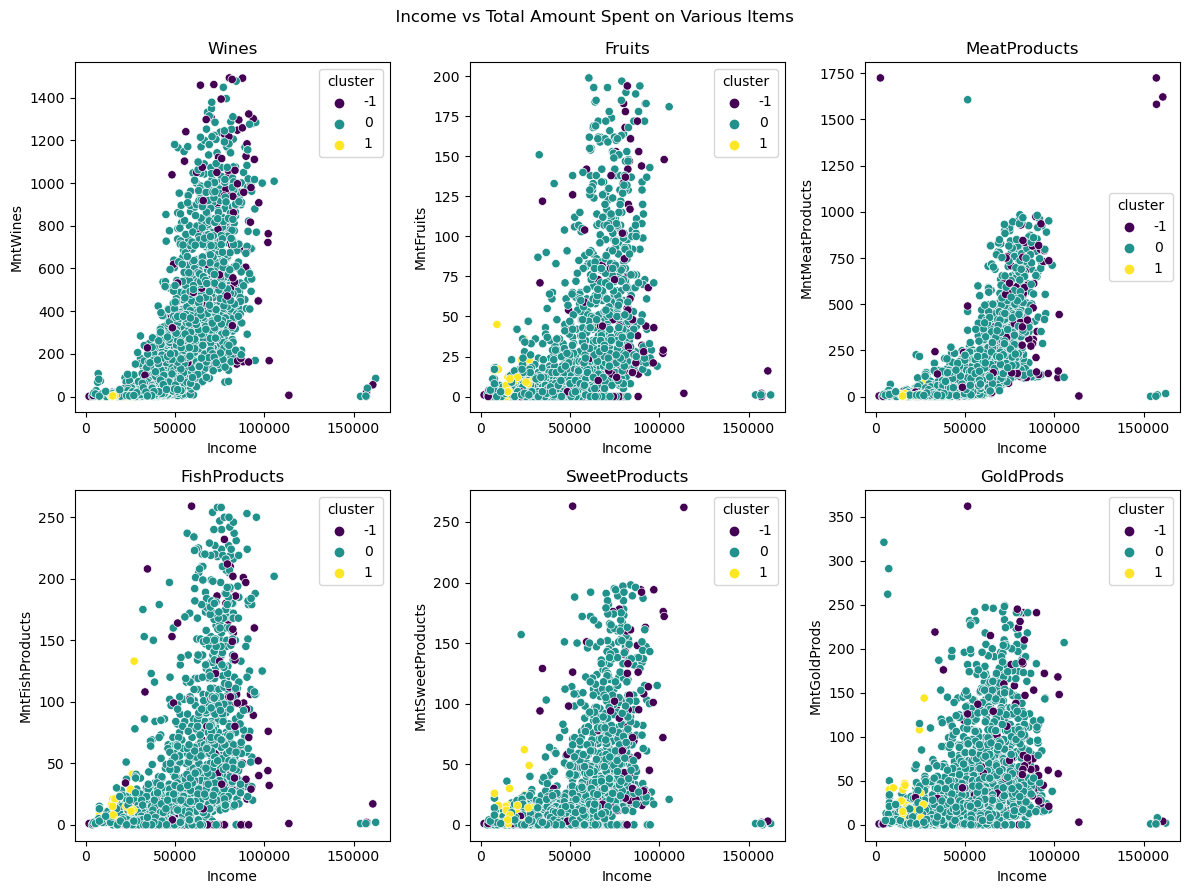

In [183]:
# Relationship between Income and Total Amount Spent on Various Items
plt.figure(figsize=(12,13))
for i, col in enumerate(df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x='Income', y=col, hue='cluster', data=df, palette='viridis')
    plt.xlabel('Income')
    plt.title(col[3:])
plt.suptitle('  Income vs Total Amount Spent on Various Items  ')
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()

#### Cluster Summary

In [184]:
results = pd.DataFrame({
    'cluster_-1': cluster_summary.loc[-1][['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']],
    'cluster_0': cluster_summary.loc[0][['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']],
    'cluster_1': cluster_summary.loc[1][['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
})

In [185]:
print('Mean Income (Annual) and Mean (monthly) spends across products: ')
display(results)

Mean Income (Annual) and Mean (monthly) spends across products: 


,cluster_-1,cluster_0,cluster_1
Income,70467.348148,51543.671547,19999.423077
MntWines,635.622222,289.926794,3.076923
MntFruits,46.118519,25.403612,9.134615
MntMeatProducts,356.222222,158.522694,9.076923
MntFishProducts,64.170370,36.402635,13.057692
MntSweetProducts,53.600000,25.767692,9.961538
MntGoldProds,68.059259,42.940947,22.538462
